# Fully Connected NN

In [1]:
# Import io functions
from io_functions import *

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

In [2]:
# Get the datasets for the first time
#signal = get_dataset('/data/vlimant/LCD/Gamma100GeV')
#bkg = get_dataset('/data/vlimant/LCD/Pi0100GeV')

# Save the datasets for faster future loading
#save_dataset("/data/vlimant/LCD/Gamma100GeV", signal)
#save_dataset("/data/vlimant/LCD/Pi0100GeV", bkg)

In [3]:
# Load the datasets
signal = load_dataset("/data/vlimant/LCD/Gamma100GeV")
bkg = load_dataset("/data/vlimant/LCD/Pi0100GeV")

## Prepare the data

In [4]:
# 1 is signal, 0 is background
X = np.concatenate( (signal, bkg), axis=0 )
Y = np.zeros( (len(X)) )
Y[:len(signal)] = 1
p = np.random.permutation(len(X))
X = X[p]
Y = Y[p]
X = X.reshape((X.shape[0], 10000))

train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.33, random_state=42)

## Create and train the model

In [5]:
# Construct and compile a network
model = Sequential()
model.add(Dense(1000, input_dim=10000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [6]:
# Train the network
my_fit = model.fit(train_data, train_labels, nb_epoch=100, batch_size=100, verbose=0)

## Visualize the classification

### Classification Histogram

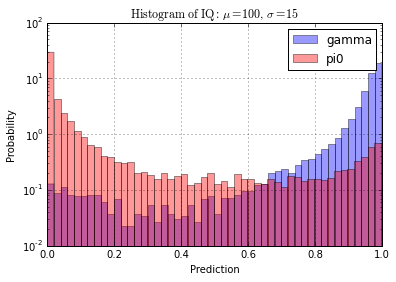

In [7]:
# Get the test signal and background to make the histogram
test_signal = test_data[np.where(test_labels==1)]
test_bkg    = test_data[np.where(test_labels==0)]

# Calculate the probabilities for the test sets
p_signal    = model.predict(test_signal)
p_bkg       = model.predict(test_bkg)

# Draw classification histogram
plt.hist(p_signal, 50, normed=1, facecolor='blue', alpha=0.4, label='gamma')
plt.hist(p_bkg , 50, normed=1, facecolor='red' , alpha=0.4, label='pi0')
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### ROC Curve

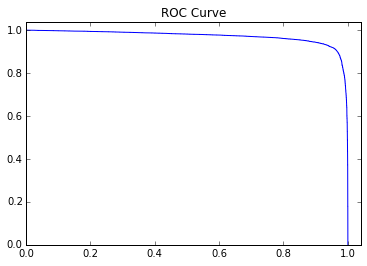

In [8]:
# Get classification predictions
predictions = model.predict(test_data)

# Draw the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([.0, 1.04])
plt.ylim([.0, 1.04])
#plt.xlabel('Prediction')
#plt.ylabel('Probability')
plt.title("ROC Curve")
plt.plot( tpr, 1-fpr )

### Loss Evolution

In [ ]:
# Draw the fit history
#plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('Training Error by Epoch')
plt.plot(my_fit.history['loss'])